In [62]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
# Open CSV

df = pd.read_csv("iris.data.csv")
df.head()

,sl,sw,pl,pw,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
# Exploratory analysis

print(df.info())
print("Describe:\n {} \n".format(df.describe()))
print("Correlation:\n {} \n".format(df.corr()))
print("Duplicated:\n {}".format(df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl        150 non-null float64
sw        150 non-null float64
pl        150 non-null float64
pw        150 non-null float64
classe    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
Describe:
                sl          sw          pl          pw
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000 

Correlation:
           sl        sw        pl        pw
sl  1.000000 -0.109369  0.871754  0.817954
sw -0.109369  1.000000 -0.420516 -0.356544
pl  0.871754 -0.420516  1.000000  0.962757


### As we can see from the exploration data analysis, this set of data has a very fast behavior, with no missing values and only 3 duplicate values, that is, after removing and coding a version of the classes. We can begin to build the forecast model.


In [79]:
# Removing Duplicates

df = df.drop_duplicates(inplace = False)

print("Duplicated:\n {}".format(df.duplicated().sum()))

Duplicated:
 0


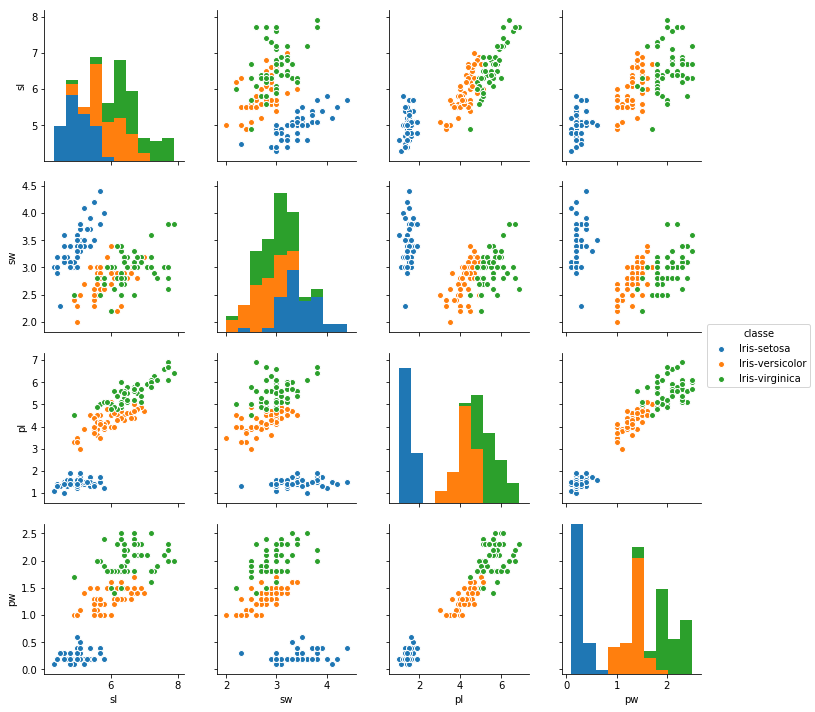

In [80]:
# Dataset Plot
sns.pairplot(df,hue = 'classe');

### This set of data can be easily classified because it is linear.

In [81]:
# Coding classes

Encoder = LabelEncoder()

numeric_class = Encoder.fit_transform(df['classe'])

df.loc[:,'classe'] = np.array(numeric_class)

In [125]:
# Importing the libraries for modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict

In [126]:
# Extracts the target variable for a specific variable and removes it from the base

X = df.drop('classe',1).values
Y = df.classe

In [127]:
for i in range(3):
    real_value = Encoder.inverse_transform(i)
    print('Value {} is: {} \n'.format(i,real_value))

Value 0 is: Iris-setosa 

Value 1 is: Iris-versicolor 

Value 2 is: Iris-virginica 



C:\Users\mathe\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mathe\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mathe\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [140]:
# Separating into test and training

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.25, random_state = 10)

# Using Decision Tree method

baseline = DecisionTreeClassifier()
baseline.fit(X_train, Y_train)
predictions = baseline.predict(X_test)
print('Decision Tree')
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test, predictions))

Decision Tree
[[11  0  0]
 [ 0 14  0]
 [ 0  2 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.88      1.00      0.93        14
          2       1.00      0.83      0.91        12

avg / total       0.95      0.95      0.95        37



In [141]:
# Using cross-validation with k-fold.

cv_results = cross_val_predict(baseline, X, Y, cv=10)
accuracy_score(Y,cv_results)

0.9523809523809523